In [8]:
import time
import pandas as pd
import umap.umap_ as umap
import umap.utils
import umap.plot
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

In [43]:
import random
def cross_validation(d, k=40):
    seeds = random.sample(range(0, 100000), k)
    embedding_x = 0
    embedding_y = 0
    for seed in seeds:
        r = umap.UMAP(random_state=seed)
        r.fit(d)
        embedding = r.transform(d)
        embedding_x += embedding[:, 0]
        embedding_y += embedding[:, 1]
    embedding_x = embedding_x / k
    embedding_y = embedding_y / k
    return embedding_x, embedding_y

In [44]:
data = pd.read_csv('..\\data\\analysis_dataset_w_material.csv', sep=";")
data_coins = data["coin"].to_list()
del data["coin"]
del data["Unnamed: 0"]

In [45]:
for c in data.columns:
    try:
        data[c] = data[c].astype(float)
    except:
        print(c)
del data["findspot"]
del data["material"]

material
findspot


In [46]:
data.columns

Index(['maxdiam', 'mindiam', 'weight', 'enddate', 'startdate', 'axis',
       'material_cat', 'denom_cat', 'mint_cat', 'collection_cat'],
      dtype='object')

In [47]:
del data["collection_cat"]
del data["mindiam"]
del data["maxdiam"]
del data["axis"]

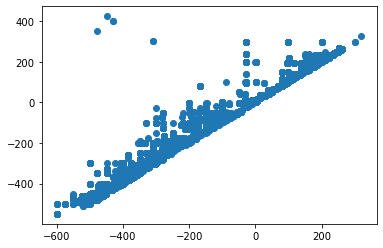

In [48]:
plt.scatter(data.startdate, data.enddate)
plt.show()

In [50]:
#make 200 steps
data_dict = dict()
data_dict["data_400bc"] = data[data["enddate"] <= -400]
data_dict["data_200bc"] = data[(data["enddate"]>-400) & (data["enddate"]<=-200)]
data_dict["data_0bc"] = data[(data["enddate"]>-200) & (data["enddate"]<=0)]
data_dict["data_0ad"] = data[(data["enddate"]>0) & (data["enddate"]<=200)]
data_dict["data_200ad"] = data[(data["enddate"]>200) & (data["enddate"]<=400)]
data_dict["data_400ad"] = data[data["enddate"] > 400]

In [51]:
for key in data_dict.keys():
    print(data_dict[key].shape)

(2639, 6)
(9068, 6)
(4204, 6)
(6552, 6)
(10851, 6)
(1, 6)


In [52]:
del data_dict["data_400ad"]
data_dict["data_200ad"] = data[data["enddate"] > 200]

data_400bc
(2320, 6)


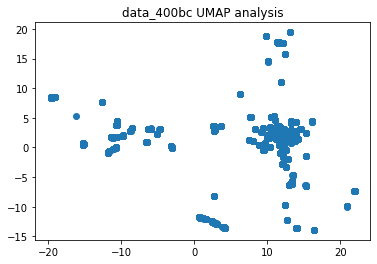

####################
data_200bc
(8382, 6)


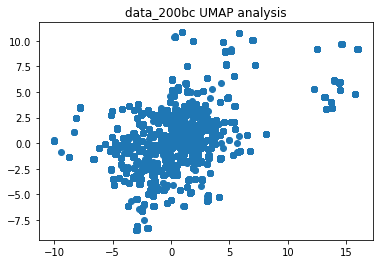

####################
data_0bc
(3738, 6)


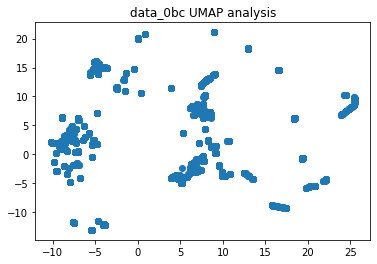

####################
data_0ad
(5344, 6)


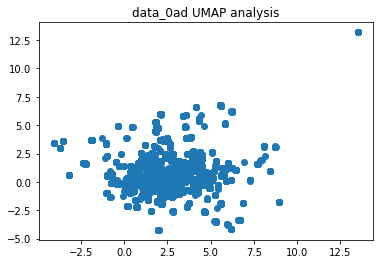

####################
data_200ad
(8046, 6)


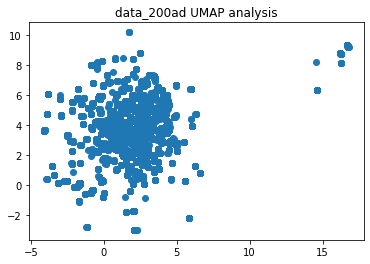

####################


In [54]:
for key in data_dict.keys():
    print(key)
    tmp_data = data_dict[key]
    tmp_data = tmp_data.dropna()
    print(tmp_data.shape)
    # scale the data
    scaler = StandardScaler()
    scaler.fit(tmp_data)
    tmp_data_standardized = scaler.transform(tmp_data)
    x, y = cross_validation(tmp_data_standardized, 20)
    plt.scatter(
    x,
    y)
    plt.title(f"{key} UMAP analysis")
    plt.show()
    print("#"*20)
    

# Add entitys

In [55]:
entity_dummys = pd.read_csv("..\\2021_06_01_DC_NLP_CNT\\design_dummys.csv", sep=";")
print(entity_dummys.shape)
print(entity_dummys.columns.to_list()[:20])

(28995, 572)
['Unnamed: 0', 'id_coin', 'entity_Abundantia', 'entity_Acrostolium', 'entity_Adler', 'entity_Adlerzepter', 'entity_Aeneas', 'entity_Aequitas', 'entity_Agrippa', 'entity_Aigis', 'entity_Alexander des Großen', 'entity_Altar', 'entity_Amphora', 'entity_Anchialos', 'entity_Anchises', 'entity_Andromeda', 'entity_Anker', 'entity_Annona', 'entity_Antinoos', 'entity_Antiochos I. Soter']


In [56]:
del entity_dummys["Unnamed: 0"]
entity_coins = entity_dummys["id_coin"].to_list()
del entity_dummys["id_coin"]
data["coin"] = data_coins
entity_dummys["coin"] = entity_coins
data_w_entity_dummys = pd.merge(data, entity_dummys, how="left", on="coin")

In [59]:
del data_w_entity_dummys["coin"]


In [60]:
data_entity_dict = dict()
data_entity_dict["data_400bc"] = data_w_entity_dummys[data_w_entity_dummys["enddate"] <= -400]
data_entity_dict["data_200bc"] = data_w_entity_dummys[(data_w_entity_dummys["enddate"]>-400) & (data_w_entity_dummys["enddate"]<=-200)]
data_entity_dict["data_0bc"] = data_w_entity_dummys[(data_w_entity_dummys["enddate"]>-200) & (data_w_entity_dummys["enddate"]<=0)]
data_entity_dict["data_0ad"] = data_w_entity_dummys[(data_w_entity_dummys["enddate"]>0) & (data_w_entity_dummys["enddate"]<=200)]
data_entity_dict["data_200ad"] = data_w_entity_dummys[(data_w_entity_dummys["enddate"]>200) & (data_w_entity_dummys["enddate"]<=400)]
data_entity_dict["data_400ad"] = data_w_entity_dummys[data_w_entity_dummys["enddate"] > 400]

In [61]:
for key in data_entity_dict.keys():
    print(data_entity_dict[key].shape)

(2639, 576)
(9068, 576)
(4204, 576)
(6552, 576)
(10851, 576)
(1, 576)


In [63]:
del data_entity_dict["data_400ad"]
data_entity_dict["data_200ad"] = data_w_entity_dummys[data_w_entity_dummys["enddate"] > 200]

data_400bc
(2019, 576)


c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral emb

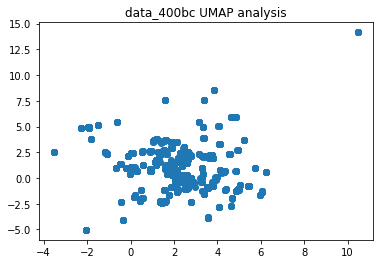

####################
data_200bc
(7210, 576)


c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral emb

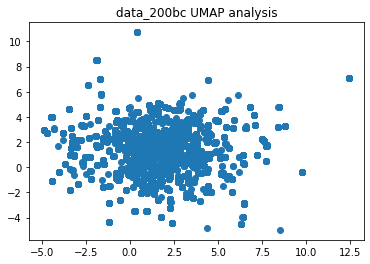

####################
data_0bc
(3323, 576)


c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral emb

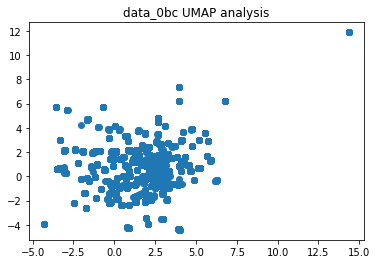

####################
data_0ad
(4587, 576)


c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral emb

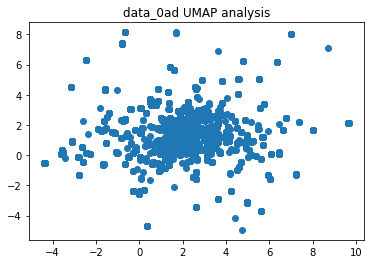

####################
data_200ad
(6379, 576)


c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\fredi\anaconda3\envs\ftp\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral emb

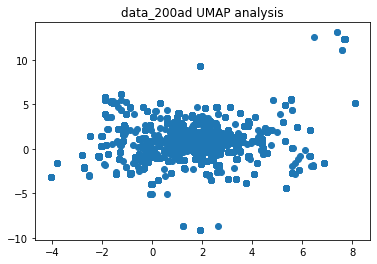

####################


In [64]:
for key in data_entity_dict.keys():
    print(key)
    tmp_data = data_entity_dict[key]
    tmp_data = tmp_data.dropna()
    print(tmp_data.shape)
    # scale the data
    scaler = StandardScaler()
    scaler.fit(tmp_data)
    tmp_data_standardized = scaler.transform(tmp_data)
    x, y = cross_validation(tmp_data_standardized, 20)
    plt.scatter(
    x,
    y)
    plt.title(f"{key} UMAP analysis")
    plt.show()
    print("#"*20)